In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegressionCV

## Carregando os dados

In [2]:
df = pd.read_csv("credit_dataset_final.csv")
df


,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1



## Análise Exploratoria

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.rating,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
account.balance,1000.0,2.183,0.835589,1.0,1.0,2.0,3.00,3.0
credit.duration.months,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
previous.credit.payment.status,1000.0,2.292,0.620581,1.0,2.0,2.0,3.00,3.0
credit.purpose,1000.0,2.965,0.971967,1.0,2.0,3.0,4.00,4.0
credit.amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,1.874,1.196476,1.0,1.0,1.0,3.00,4.0
employment.duration,1000.0,2.446,1.105580,1.0,2.0,2.0,4.00,4.0
installment.rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
marital.status,1000.0,2.372,1.067125,1.0,1.0,3.0,3.00,4.0


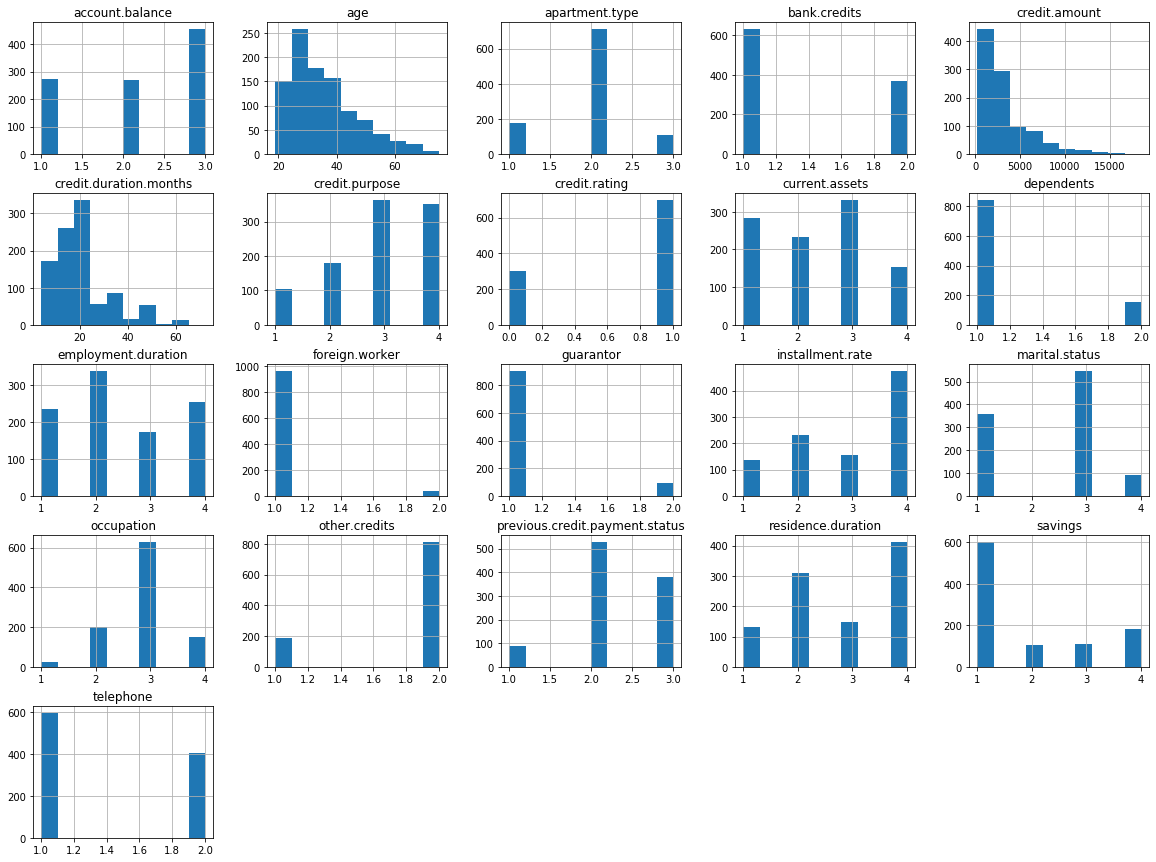

In [5]:
df.hist(figsize=(20,15))
plt.show()

In [7]:
colunasCategoricas = ['account.balance', 'previous.credit.payment.status',
                      'credit.purpose', 'savings', 'employment.duration', 'installment.rate',
                      'marital.status', 'guarantor', 'residence.duration', 'current.assets',
                      'other.credits', 'apartment.type', 'bank.credits', 'occupation', 
                      'dependents', 'telephone', 'foreign.worker']

In [8]:
df[colunasCategoricas] = df[colunasCategoricas].astype('category')

## Model 1

In [9]:
y , x = df['credit.rating'] , df.drop('credit.rating', axis = 1)

In [10]:
model = LogisticRegressionCV()

In [11]:
model.fit(x , y)

C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [12]:
model.score(x, y )

0.77

In [53]:
df['account.balance'].astype('category')

0      1
1      1
2      2
3      1
4      1
      ..
995    1
996    1
997    3
998    2
999    1
Name: account.balance, Length: 1000, dtype: category
Categories (3, int64): [1, 2, 3]

## Model 2

In [95]:
df2 = pd.get_dummies(df)

In [96]:
LogReg = LogisticRegressionCV()

In [97]:
y , x = df2['credit.rating'] , df2.drop('credit.rating', axis = 1)

In [98]:
LogReg.fit(x , y )

C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\arthu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [99]:
LogReg.score(x , y)

0.767